# Execute the code below

In [0]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [0]:
df_weather.head()

DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  ...   OPINION  MONTH  DAY
0  2019-01-01                  9                  4  ...  very bad      1    1
1  2019-01-02                  8                  5  ...  very bad      1    2
2  2019-01-03                  6                  0  ...  very bad      1    3
3  2019-01-04                  5                 -1  ...  very bad      1    4
4  2019-01-05                  6                 -1  ...  very bad      1    5

[5 rows x 24 columns]

# Now, complete the following tasks :
# Let's go in the deep !

## Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. And finally drop the duplicate date column to clean your dataframe.

In [0]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [0]:
# Your code here :
df2018 = df_main.merge(df_opinion, how='left', left_on='DATE', right_on='date', )

In [0]:
df2018.drop('date', axis = 1, inplace=True)

### Result

Your DataFrame **df2018** should now have 20 columns and 365 rows. If not, try again.

**Ohhhh, there are some missing values, we have to fill them.**

In [0]:
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ?')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ?
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C       

### Find the Dates of missing values.
You can help you with the method .isna()

In [0]:
# Your code here :
df2018['DATE'][df2018.isna().any(axis=1)]

18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object

## Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [0]:
df2018['flag'] = df2018['OPINION'].isna()

## Visualize and Fill the NaN

### First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

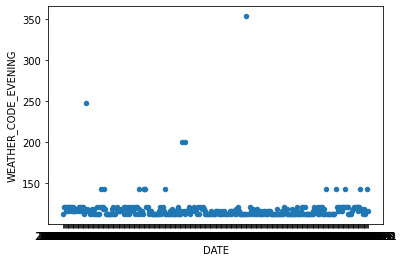

In [0]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018.plot.scatter(x = 'DATE', y = 'WEATHER_CODE_EVENING') #Code to complete 

#### Boxplot directly with Pandas

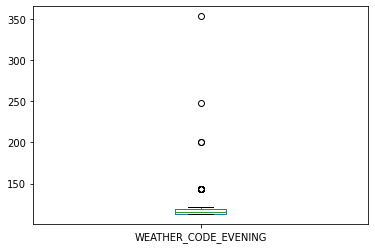

In [0]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018.boxplot('WEATHER_CODE_EVENING', grid=False)

#### Deciles

In [0]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop
print(
    'min:', df2018.WEATHER_CODE_EVENING.quantile(q = 0), '\n',
    '9th decile:', df2018.WEATHER_CODE_EVENING.quantile(q = 0.9), '\n',
    'max:', df2018.WEATHER_CODE_EVENING.quantile(q = 1))

min: 113.0 
 9th decile: 122.0 
 max: 353.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the fillna() method 
When you're OK, remember tu use the *inplace=True* argument

In [0]:
# Hop !
df2018['flag'] = df2018['WEATHER_CODE_EVENING'].isna()
df2018.WEATHER_CODE_EVENING.fillna(df2018.WEATHER_CODE_EVENING.median(), inplace=True)

In [0]:
df2018.WEATHER_CODE_EVENING.isna().sum()

0

### Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for the both columns

In [0]:
# Your code here
df2018.loc[:, ['TOTAL_SNOW_MM', 'UV_INDEX']].describe()

df2018.TOTAL_SNOW_MM.fillna(0.0, inplace=True)
df2018.UV_INDEX.fillna(df2018.UV_INDEX.median(), inplace=True)

### Next column : 
SUNHOUR

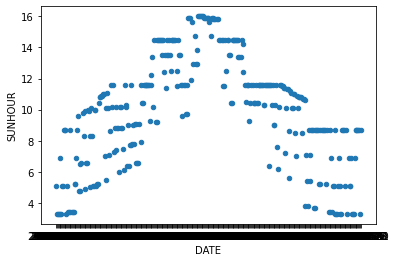

In [0]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis
df2018.plot.scatter(x = 'DATE', y = 'SUNHOUR') 

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the *method = 'ffill' or 'bfill'* argument in fill_na() to propagate non-null values forward or backward.

In [0]:
# Your code here
df2018.SUNHOUR.fillna(method='ffill', inplace = True)

### Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [0]:
df2018.OPINION.fillna('unknown', inplace = True)

## Now, each axis should have 365 non-null values.

In [0]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with "hue".

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


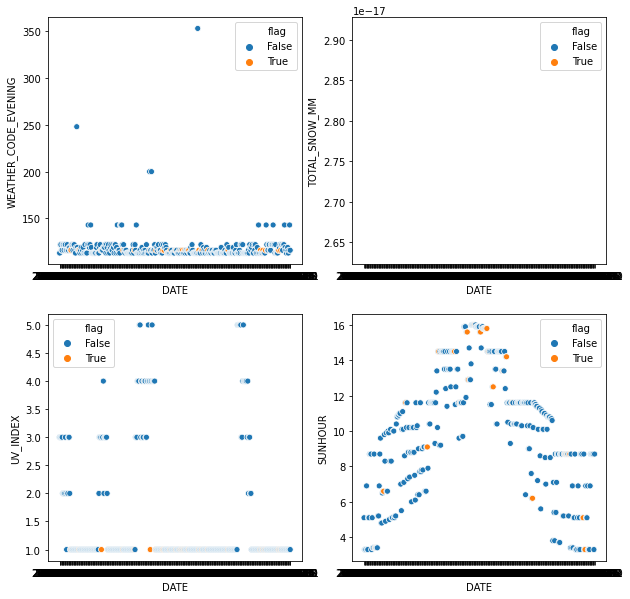

In [0]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,10))
ax1 = plt.subplot(221)
sns.scatterplot(x = 'DATE', y = 'WEATHER_CODE_EVENING', hue = 'flag', data = df2018)
ax2 = plt.subplot(222)
sns.scatterplot(x = 'DATE', y = 'TOTAL_SNOW_MM', hue = 'flag', data = df2018)
ax2 = plt.subplot(223)
sns.scatterplot(x = 'DATE', y = 'UV_INDEX', hue = 'flag', data = df2018)
ax2 = plt.subplot(224)
sns.scatterplot(x = 'DATE', y = 'SUNHOUR', hue = 'flag', data = df2018)

plt.show()

# Apply and Lambda

You know functions, but do you know lambda functions ? Let's try to apply this.

## MONTH
We want to create a new column with Month.

"Apply" allows you to apply a function to each of the cell values.

In [0]:
# Try to execute this code :
print(df2018['MAX_TEMPERATURE_C'])
print(df2018['MAX_TEMPERATURE_C'].apply(lambda x: x*10))
# In lambda function, "x" represents the value of each cell. 
# So in the Max temperature columns, it's integers, so I can multiply it by 10 for example.

0      12
1      13
2      15
3      14
4      12
       ..
360     7
361     7
362     7
363     9
364     9
Name: MAX_TEMPERATURE_C, Length: 365, dtype: int64
0      120
1      130
2      150
3      140
4      120
      ... 
360     70
361     70
362     70
363     90
364     90
Name: MAX_TEMPERATURE_C, Length: 365, dtype: int64


### Create a column Month
It's to you now. In an ideal world, we teach you how to convert date into a real date-format. But it's too early. So, you know how to play with characters strings :
- Try to get only the 2 numbers of the month on a little character string
- Apply this to the Date columns with a lambda function
- Create a new column "MONTH" with that

In [0]:
df2018['MONTH'] = df2018['DATE'].apply(lambda x:x[5:7])

df2018.MONTH

0      01
1      01
2      01
3      01
4      01
       ..
360    12
361    12
362    12
363    12
364    12
Name: MONTH, Length: 365, dtype: object

## DAY
Do the same thing to create a new column "DAY"

In [0]:
# Hop !
df2018['DAY'] = df2018['DATE'].apply(lambda x:x[8:])
df2018.DAY

0      01
1      02
2      03
3      04
4      05
       ..
360    27
361    28
362    29
363    30
364    31
Name: DAY, Length: 365, dtype: object

# Concatenate 2 DataFrames
Concatenate both DataFrames (your new 2018 & 2019 above) on the 0 axis. Your goal is to have a DataFrame with 25 columns and 730 rows (365*2 years).

Why 25 columns ? There are 22 common columns, 1 dedicated column for 2018 (flag) and 2 dedicated columns for 2019.

[Different ways to concatenate and merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [0]:
# Hop !
df = pd.concat([df_weather, df2018])
df.shape

(730, 25)

## Add a Year Column

In [0]:
# Hop !
df['YEAR'] = df['DATE'].apply(lambda x: x[:4])

In [0]:
df['YEAR']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
360    2018
361    2018
362    2018
363    2018
364    2018
Name: YEAR, Length: 730, dtype: object

# Draw 4 charts to compare 2018 and 2019 :
- Histogram for the Windspeed
- Boxplots for the Precipitation
- Scaterplots for Sunhour and Date
- Violin plots for Max Temperature

On each chart, we could read if 2018 and 2019 are different or similar, so use color !

In [0]:
df.info()

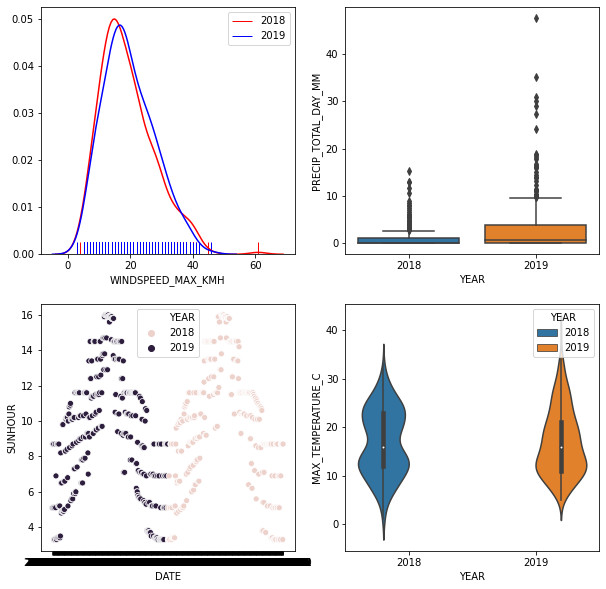

In [0]:
# Hop !
fig, ax = plt.subplots(figsize = (10, 10))
ax1 = plt.subplot(221)
sns.distplot(df['WINDSPEED_MAX_KMH'][df['YEAR'] == '2018'], hist = False, rug = True, color = 'r')
sns.distplot(df['WINDSPEED_MAX_KMH'][df['YEAR'] == '2019'], hist = False, rug = True, color = 'b')
ax1.legend(['2018', '2019'])

ax2 = plt.subplot(222)
sns.boxplot(x = 'YEAR', y ='PRECIP_TOTAL_DAY_MM', data = df)

ax2 = plt.subplot(223)
sns.scatterplot(x = 'DATE', y = 'SUNHOUR', data = df, hue = 'YEAR')

ax2 = plt.subplot(224)
sns.violinplot(x = 'YEAR', y = 'MAX_TEMPERATURE_C', data = df, hue = 'YEAR')

plt.show()